In [5]:
import pymatgen as pmg
import pymatgen.io.phonopy as phon
import pymatgen.phonon.plotter as pplt

from os.path import expanduser
home = expanduser('~')

# from pymatgen.io.vasp.outputs import Vasprun
# from pymatgen.electronic_structure.plotter import DosPlotter
# from pymatgen.core.periodic_table import Element
# from matplotlib.pyplot import figure

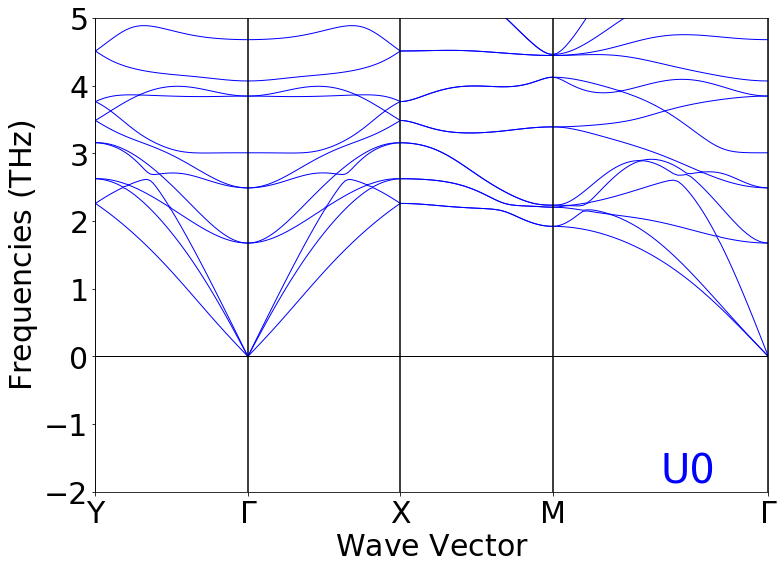

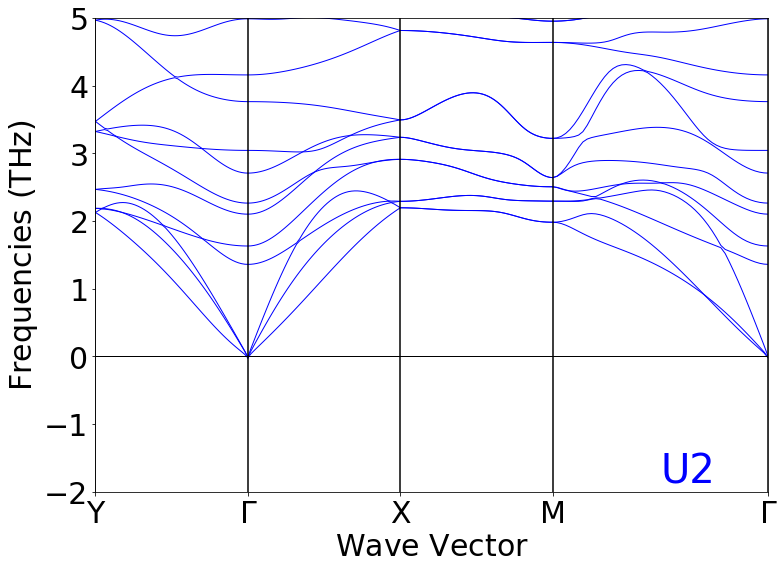

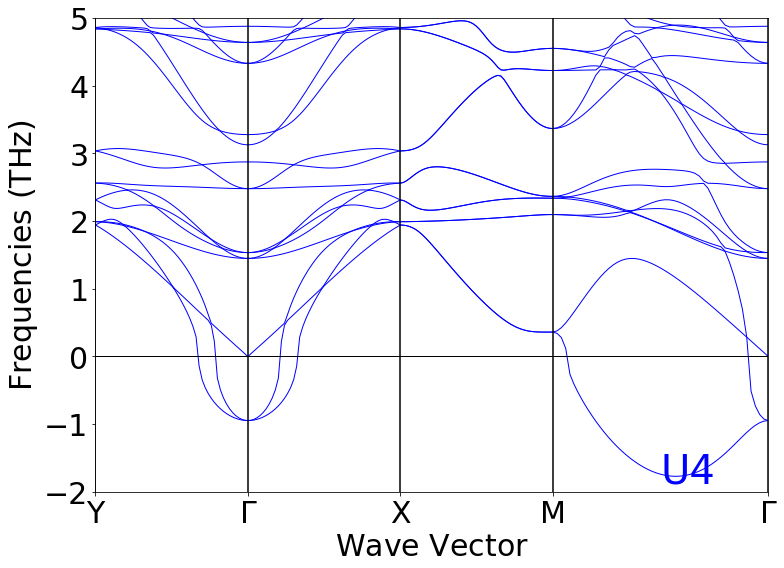

In [12]:
WIDTH = 11
HEIGHT = 8
PREFIX = home + '/Projects/BaCoS2/correct_mag/phonons'
SUFFIX = "band.yaml"
ITERS_1 = ['U0', 'U2', 'U4']
PLOT_LABELS = ITERS_1
LABEL_FONT = 30
YMIN = -2; YMAX = 5

# Save the band structure objects referenced by iter for later use
bands = {}

# Specify the path through the BZ
bspath = {'Y':(0,0.5,0),'$\Gamma$':(0,0,0), 'X':(0.5,0,0),'M':(0.5,0.5,0), '$\Gamma$':(0,0,0)}

for i, iter1 in enumerate(ITERS_1):
    
    ### Creating band struc from band.yaml files
    bs = phon.get_ph_bs_symm_line(f"{PREFIX}/{SUFFIX}-{iter1}", labels_dict=bspath)
    bands.update({iter1:bs})
    plotter = pplt.PhononBSPlotter(bs)
    band_plot = plotter.get_plot(ylim=[YMIN,YMAX])
    
    ### Formatting
#     band_plot.grid(1)
    fig = band_plot.gcf()
    fig.set_size_inches(WIDTH,HEIGHT)
    
    band_plot.text(0.88, 0, PLOT_LABELS[i], horizontalalignment='center', verticalalignment='bottom',\
         transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='blue')
    
    ### Displaying and saving
    band_plot.tight_layout() #prevents edges from being cut off
    band_plot.show()
    
    fig.savefig(f'band-plot-{iter1}.png',dpi=500)
    fig.savefig(f'band-plot-vec-{iter1}.pdf')

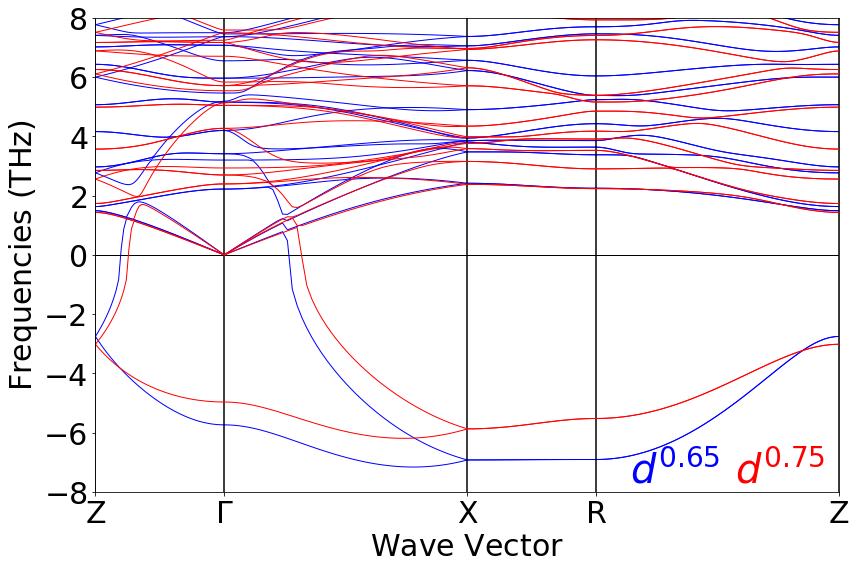

In [17]:
### Plotting some comparisons
# d0.65 vs d0.75
i1 = 2
i2 = 3

p1 = pplt.PhononBSPlotter(bands[ITERS_1[i1]])
p2 = pplt.PhononBSPlotter(bands[ITERS_1[i2]])
band_plot = p1.plot_compare(p2)

### Formatting
fig = band_plot.gcf()
band_plot.ylim(-8,8)
band_plot.text(0.78, 0, DOPING_LABELS[i1], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='blue')
band_plot.text(0.92, 0, DOPING_LABELS[i2], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='red')

### Showing and saving
band_plot.tight_layout() #prevents edges from being cut off
fig.savefig(f'band-comp-{ITERS_1[i1]}-{ITERS_1[i2]}.png',dpi=500)
fig.savefig(f'band-comp-vec-{ITERS_1[i1]}-{ITERS_1[i2]}.pdf')


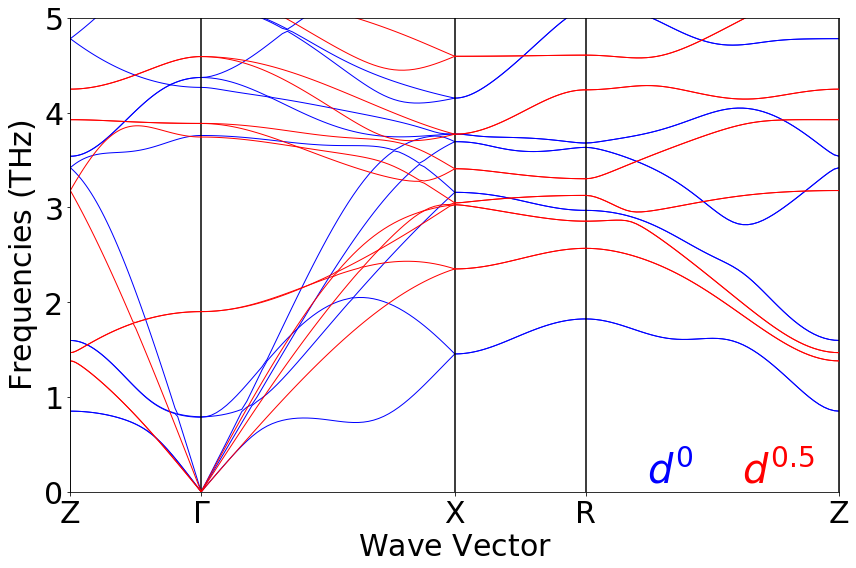

In [18]:
### Plotting some comparisons
# d0 vs d0.5
i1 = 0
i2 = 1

p1 = pplt.PhononBSPlotter(bands[ITERS_1[i1]])
p2 = pplt.PhononBSPlotter(bands[ITERS_1[i2]])
band_plot = p1.plot_compare(p2)

### Formatting
band_plot.ylim(0,5)
band_plot.text(0.78, 0, DOPING_LABELS[i1], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='blue')
band_plot.text(0.92, 0, DOPING_LABELS[i2], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='red')

### Showing and saving
band_plot.tight_layout() #prevents edges from being cut off
fig = band_plot.gcf()
fig.savefig(f'band-comp-{ITERS_1[i1]}-{ITERS_1[i2]}.png',dpi=500)
fig.savefig(f'band-comp-vec-{ITERS_1[i1]}-{ITERS_1[i2]}.pdf')

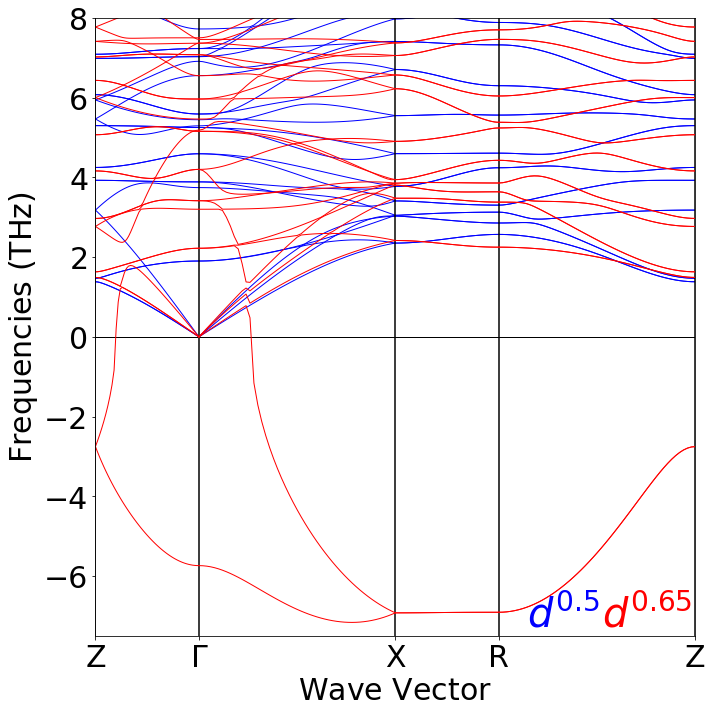

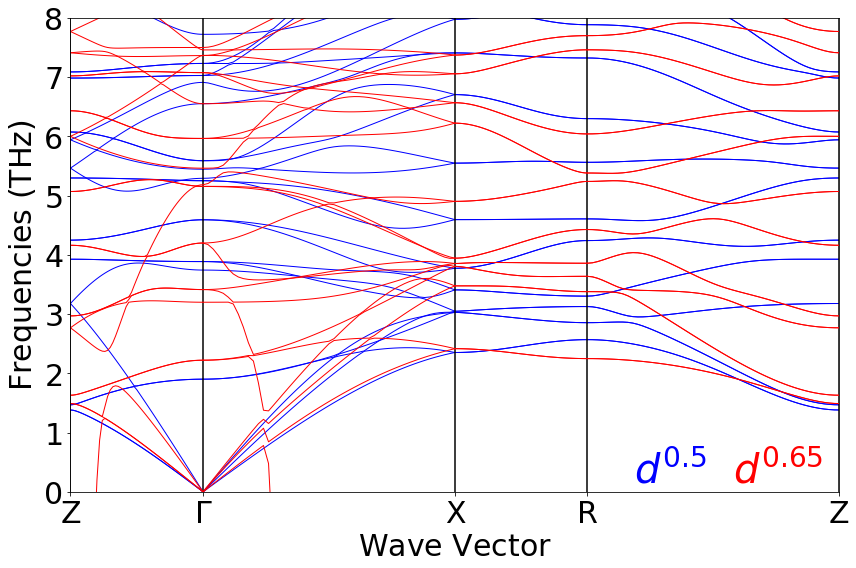

In [23]:
### Plotting some comparisons
# d0.5 vs d0.65
i1 = 1
i2 = 2

p1 = pplt.PhononBSPlotter(bands[ITERS_1[i1]])
p2 = pplt.PhononBSPlotter(bands[ITERS_1[i2]])
band_plot = p1.plot_compare(p2)

### Formatting
fig = band_plot.gcf()
fig.set_size_inches(10,10)
band_plot.ylim(-7.5,8)
band_plot.text(0.78, 0, DOPING_LABELS[i1], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='blue')
band_plot.text(0.92, 0, DOPING_LABELS[i2], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='red')

### Showing and saving
band_plot.tight_layout() #prevents edges from being cut off

fig.savefig(f'band-comp-{ITERS_1[i1]}-{ITERS_1[i2]}.png',dpi=500)
fig.savefig(f'band-comp-vec-{ITERS_1[i1]}-{ITERS_1[i2]}.pdf')




### Plotting some comparisons
# d0.5 vs d0.65
i1 = 1
i2 = 2

p1 = pplt.PhononBSPlotter(bands[ITERS_1[i1]])
p2 = pplt.PhononBSPlotter(bands[ITERS_1[i2]])
band_plot = p1.plot_compare(p2)

### Formatting
fig = band_plot.gcf()
fig.set_size_inches(12,8)
band_plot.ylim(0,8)
band_plot.text(0.78, 0, DOPING_LABELS[i1], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='blue')
band_plot.text(0.92, 0, DOPING_LABELS[i2], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='red')

### Showing and saving
band_plot.tight_layout() #prevents edges from being cut off

fig.savefig(f'band-comp-{ITERS_1[i1]}-{ITERS_1[i2]}-top.png',dpi=500)
fig.savefig(f'band-comp-vec-{ITERS_1[i1]}-{ITERS_1[i2]}-top.pdf')

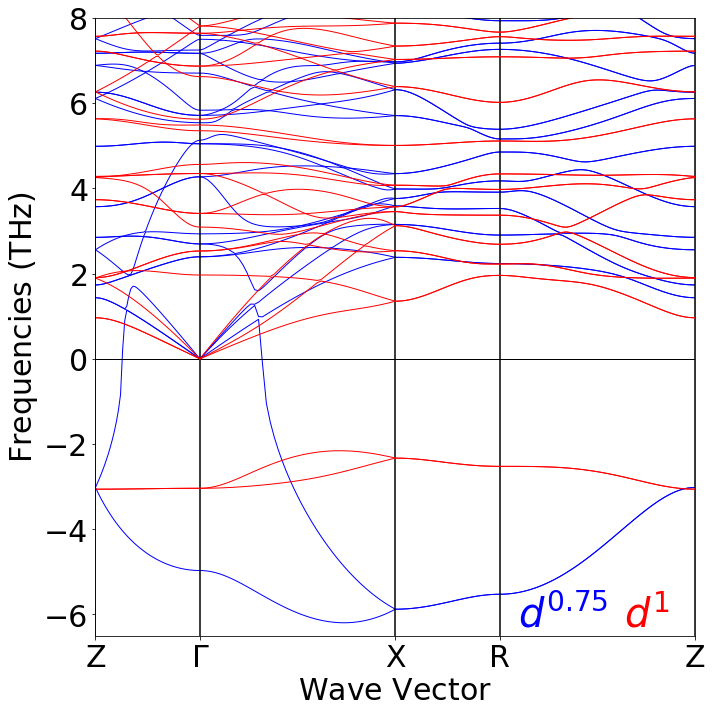

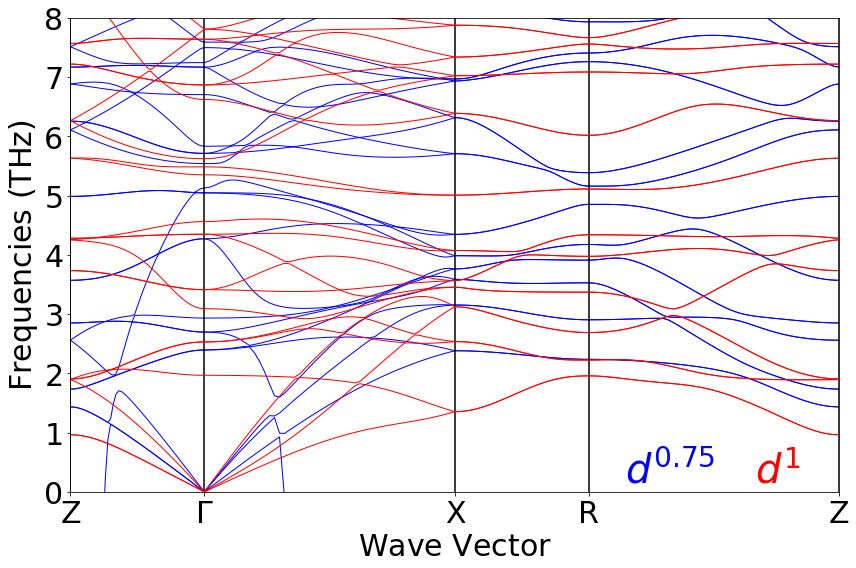

In [25]:
### Plotting some comparisons
# d0.5 vs d0.65
i1 = 3
i2 = 4

p1 = pplt.PhononBSPlotter(bands[ITERS_1[i1]])
p2 = pplt.PhononBSPlotter(bands[ITERS_1[i2]])
band_plot = p1.plot_compare(p2)

### Formatting
fig = band_plot.gcf()
fig.set_size_inches(10,10)
band_plot.ylim(-6.5,8)
band_plot.text(0.78, 0, DOPING_LABELS[i1], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='blue')
band_plot.text(0.92, 0, DOPING_LABELS[i2], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='red')

### Showing and saving
band_plot.tight_layout() #prevents edges from being cut off

fig.savefig(f'band-comp-{ITERS_1[i1]}-{ITERS_1[i2]}.png',dpi=500)
fig.savefig(f'band-comp-vec-{ITERS_1[i1]}-{ITERS_1[i2]}.pdf')




### Plotting some comparisons
# d0.5 vs d0.65
i1 = 3
i2 = 4

p1 = pplt.PhononBSPlotter(bands[ITERS_1[i1]])
p2 = pplt.PhononBSPlotter(bands[ITERS_1[i2]])
band_plot = p1.plot_compare(p2)

### Formatting
fig = band_plot.gcf()
fig.set_size_inches(12,8)
band_plot.ylim(0,8)
band_plot.text(0.78, 0, DOPING_LABELS[i1], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='blue')
band_plot.text(0.92, 0, DOPING_LABELS[i2], horizontalalignment='center', verticalalignment='bottom',\
     transform=band_plot.gca().transAxes,fontsize=LABEL_FONT+10,color='red')

### Showing and saving
band_plot.tight_layout() #prevents edges from being cut off

fig.savefig(f'band-comp-{ITERS_1[i1]}-{ITERS_1[i2]}-top.png',dpi=500)
fig.savefig(f'band-comp-vec-{ITERS_1[i1]}-{ITERS_1[i2]}-top.pdf')